In [1]:
# ------------------------------------------------------------------------
#
# TITLE - paper_fig4_IG.ipynb
# AUTHOR - James Lane
# PROJECT - mw-dfs
#
# ------------------------------------------------------------------------
#
# Docstrings and metadata:
'''Make the figures for the inner galaxy augmented sample
'''

__author__ = "James Lane"

In [3]:
### Imports

## Basic
import numpy as np, pdb, sys, pickle
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import patches
from matplotlib import gridspec
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable
import astropy.units as apu

## galpy
from galpy import potential
ro = 8.178 # Gravity 2019
vo = 220
zo = 0.0208 # Bennet + Bovy 2018

sys.path.append('../../src/')
from mw_dfs import plot as project_plot
from mw_dfs import potential as project_potential

# Setup colors
project_colors = project_plot.colors()
rainbow_cmap = project_colors.colourmap('rainbow')

# Potential
pot = project_potential.make_interpolated_mwpot(rmin=1e-3,rmax=1e3,ngrid=301,ro=ro,vo=vo,match_type='mass')

In [4]:
### Notebook setup
%matplotlib inline
plt.style.use('../../src/mpl/project.mplstyle')
%config InlineBackend.figure_format = 'retina'
%load_ext autoreload
%autoreload 2

In [7]:
### Keywords
seed = 7703
oversample_factor_halo = 100

# Directories
fig_dir = './fig/'
data_dir = '/geir_data/scr/lane/projects/mw-dfs/data/data_Sept_2021/df_samples/'

# Figure sizing
columnwidth = 240./72.27
textwidth = 504.0/72.27

# Plotting keywords
scatter_s = 1.0
scatter_alpha = 0.1
scatter_zorder = 2
scatter_color = 'DodgerBlue'
label_fontsize = 9
nbins = 50

# Potential
phi0 = potential.evaluatePotentials(pot,1e12,0).value

# Load data

In [33]:
with open(data_dir+'halo_orbits_survey_os_factor'+\
          str(oversample_factor_halo)+'.pkl','rb') as f:
    halo_orbs_apo = pickle.load(f)
##wi
with open(data_dir+'halo_actions_survey_os_factor'+\
          str(oversample_factor_halo)+'.pkl','rb') as f:
    halo_actions_apo = pickle.load(f)
##wi
with open(data_dir+'halo_eELzs_survey_os_factor'+\
          str(oversample_factor_halo)+'.pkl','rb') as f:
    halo_eELzs_apo = pickle.load(f)
##wi

with open(data_dir+'halo_orbits_ig_survey_os_factor'+\
          str(oversample_factor_halo)+'.pkl','rb') as f:
    ig_halo_orbs_apo = pickle.load(f)
##wi
with open(data_dir+'halo_actions_ig_survey_os_factor'+\
          str(oversample_factor_halo)+'.pkl','rb') as f:
    ig_halo_actions_apo = pickle.load(f)
##wi
with open(data_dir+'halo_eELzs_ig_survey_os_factor'+\
          str(oversample_factor_halo)+'.pkl','rb') as f:
    ig_halo_eELzs_apo = pickle.load(f)
##wi

# Undo the oversampling
for i in range(len(halo_orbs_apo)):
    halo_orbs_apo[i] = halo_orbs_apo[i][::100]
    halo_actions_apo[i] = halo_actions_apo[i][:,::100]
    halo_eELzs_apo[i] = halo_eELzs_apo[i][:,::100]
    
    ig_halo_orbs_apo[i] = ig_halo_orbs_apo[i][::100]
    ig_halo_actions_apo[i] = ig_halo_actions_apo[i][:,::100]
    ig_halo_eELzs_apo[i] = ig_halo_eELzs_apo[i][:,::100]

In [34]:
# Turn into lists for parsing
n_orbs_halo = len(halo_orbs_apo[0])
n_orbs_halo_ig = len(ig_halo_orbs_apo[0])
print(n_orbs_halo)
print(n_orbs_halo_ig)

2198
497


In [35]:
# Different halo mixtures that will be plotted
halo_mixture_arr_apo = np.array([[1.0 ,0   ,0   ,0   ,0  ], # 100% ergodic
                                 [0   ,0.5 ,0   ,0   ,0  ], # beta = -0.5
                                 [0   ,0   ,0.5 ,0   ,0  ], # beta = 0.5
                                 [0   ,0   ,0   ,0.5 ,0  ], # beta = 0.7
                                 [0   ,0   ,0   ,0   ,0.5], # beta = 0.9
                                 [0   ,0   ,0.5 ,0   ,0.5], # Standard model
                                ])
n_mix = len(halo_mixture_arr_apo)

mixture_text = [r'ergodic',
                r'$\beta=-0.5$',
                r'$\beta=0.5$',
                r'$\beta=0.7$',
                r'$\beta=0.9$',
                r'fiducial',
               ]

In [36]:
kin_spaces = ['ELz',]

# Labels dictionary. [xlabel, ylabel]
labels_dict = {'ELz':    [r'$L_{z}$',r'$(E-\Phi_{0})/10^{5}$'],
               }

# Limits dictionary. [ [xmin,xmax], [ymin,ymax] ]
lims_dict = {'ELz':    [[-4500,4500], [-2.,-0.]],
            }

In [37]:
# E-Lz boundary
ELz_bound_rs = np.array([3.5,6,8])*apu.kpc
ELz_bound_Lz_facs = np.array([200,200,200])*apu.kpc

## Distribution of radii

../../src/mw_dfs/plot.py:72: UserWarning: Warning, absolute=False. Not using absolute mixture array fractions!
  warnings.warn('Warning, absolute=False. Not using absolute mixture array fractions!')

/usr/local/lib/python3.6/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "



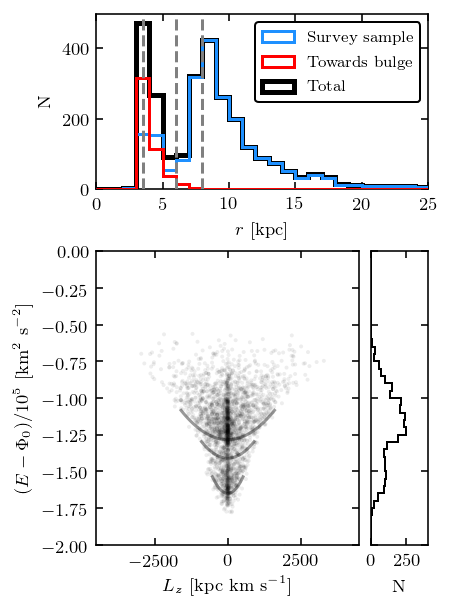

In [40]:
fig = plt.figure()
fig.set_size_inches(columnwidth,4.5)
gs = gridspec.GridSpec(nrows=5,ncols=5)
ax1 = fig.add_subplot(gs[:2,:])
ax2 = fig.add_subplot(gs[2:,:4])
ax3 = fig.add_subplot(gs[2:,4])

halo_rs_apo = halo_orbs_apo[0].r().value
ig_halo_rs_apo = ig_halo_orbs_apo[0].r().value

ax1.hist(halo_rs_apo, range=(0,25), bins=25, histtype='step', color='DodgerBlue', linewidth=1.5,
        zorder=4, label='Survey sample')
ax1.hist(ig_halo_rs_apo, range=(0,25), bins=25, histtype='step', color='Red', linewidth=1.5, 
        zorder=5, label=r'Towards bulge')
ax1.hist(np.concatenate((ig_halo_rs_apo,halo_rs_apo)), range=(0,25), bins=25, histtype='step', 
        color='Black', linewidth=2.5, zorder=3, label='Total')
for i in range(len(ELz_bound_rs)):
    ax1.axvline(ELz_bound_rs[i].value, color='Grey', linestyle='dashed', alpha=1., zorder=6)
###i

ax1.set_xlim(0,25)
ax1.set_xlabel('$r$ [kpc]', fontsize=label_fontsize)
ax1.set_ylabel('N', fontsize=label_fontsize)
ax1.tick_params(axis='both', labelsize=label_fontsize)
ax1.legend(loc='upper right', fontsize=8)

xlim,ylim = lims_dict['ELz']
xlabel,ylabel = labels_dict['ELz']

xplot,yplot = project_plot.get_plottable_data( halo_orbs_apo, 
    halo_eELzs_apo, halo_actions_apo, 
    np.array([0.6,0.0,0.0,0.2,0.2]), 'ELz', phi0=phi0, seed=seed)
xplot_ig,yplot_ig = project_plot.get_plottable_data( ig_halo_orbs_apo, 
    ig_halo_eELzs_apo, ig_halo_actions_apo, 
    np.array([0.6,0.0,0.0,0.2,0.2]), 'ELz', phi0=phi0, seed=seed)
xplot_all = np.concatenate((xplot,xplot_ig))
yplot_all = np.concatenate((yplot,yplot_ig))

ax2.scatter(xplot_all, yplot_all, s=4, alpha=0.07, 
           facecolor='Black', edgecolor='None', zorder=2, 
           rasterized=True)
ELz_kws = {'linewidth':1.5, 'color':'Black', 'alpha':0.4, 'zorder':3}
project_plot.add_ELz_boundary(ax2, pot, ELz_bound_rs, np.array([150,150,200]), 
    z=False, E_scale=1e5, phi0=phi0, plot_kws=ELz_kws, ro=ro)

ax2.set_xlim(xlim)
ax2.set_ylim(ylim)
ax2.set_xlabel('$L_{z}$ [kpc km s$^{-1}$]', fontsize=label_fontsize)
ax2.set_ylabel('($E-\Phi_{0}$)/10$^{5}$ [km$^{2}$ s$^{-2}$]', fontsize=label_fontsize)
ax2.tick_params(axis='both', labelsize=label_fontsize)

ax3.hist(yplot_all, orientation='horizontal', bins=40, edgecolor='Black', histtype='step', 
         range=(-2,0))
ax3.tick_params(labelleft=False)
ax3.tick_params(axis='x', labelsize=label_fontsize)
ax3.set_xlabel('N', fontsize=label_fontsize)
ax3.set_xlim(0,400)
ax3.set_ylim(ylim)

fig.tight_layout()
fig.subplots_adjust(hspace=1.1,wspace=0.2)
fig.savefig('fig/APOGEEHaloRadialBias.pdf', rasterized=True, dpi=300)
fig.show()

In [ ]:
# Specific keywords
this_scatter_alpha = 2*scatter_alpha
this_scatter_s = 1*scatter_s
ELz_kws = {'linewidth':0.5, 'color':'Black', 'alpha':0.75, 'zorder':3}

# Figure
fig = plt.figure()
fig.set_size_inches(1.5*textwidth,0.7*textwidth)
axs = fig.subplots(nrows=3, ncols=n_mix)

for i in range(3):
    
    # Limits and labels
    xlim,ylim = lims_dict[kin_spaces[0]]
    xlabel,ylabel = labels_dict[kin_spaces[0]]
    xbinsize = (xlim[1]-xlim[0])/nbins
    ybinsize = (ylim[1]-ylim[0])/nbins
    
    for j in range( n_mix ):
        
        # Plot
        xplot,yplot = project_plot.get_plottable_data( halo_orbs_apo, 
            halo_eELzs_apo, halo_actions_apo, 
            halo_mixture_arr_apo[j], kin_spaces[0], phi0=phi0, seed=seed)
        xplot_ig,yplot_ig = project_plot.get_plottable_data( ig_halo_orbs_apo, 
            ig_halo_eELzs_apo, ig_halo_actions_apo, 
            halo_mixture_arr_apo[j], kin_spaces[0], phi0=phi0, seed=seed)
        if i in [0,2]:
            axs[i,j].scatter(xplot, yplot, s=this_scatter_s, alpha=this_scatter_alpha, 
                facecolor=scatter_color, edgecolor='None', zorder=scatter_zorder, 
                rasterized=True)
        if i in [1,2]:
            axs[i,j].scatter(xplot_ig, yplot_ig, s=this_scatter_s, alpha=this_scatter_alpha, 
                facecolor=scatter_color, edgecolor='None', zorder=scatter_zorder, 
                rasterized=True)
        
        # Decoration
        project_plot.axis_limits_and_labels(axs[i,j], xlim, ylim, xlabel, ylabel, mixture_text[j],
            is_left_edge=j==0, is_top_edge=i==0, label_fontsize=label_fontsize)
        project_plot.add_ELz_boundary(axs[i,j], pot, ELz_bound_rs, ELz_bound_Lz_facs, z=False, 
                                       E_scale=1e5, phi0=phi0, plot_kws=ELz_kws)
    ###j
###i

fig.tight_layout()
fig.subplots_adjust(wspace=0.1)
fig.show()